In [189]:
import pandas as pd
import seaborn as sns
import plotly.express as px

# Загрузка данных и знакомство с ними

In [190]:
# 
df = pd.read_csv('../data/ds_salaries.csv')
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [191]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [192]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [193]:
df['work_year'] = df['work_year'].astype('uint16')
df['experience_level'] = df['experience_level'].astype('category')
df['employment_type'] = df['employment_type'].astype('category')
df['salary'] = df['salary'].astype('uint32')
df['salary_currency'] = df['salary_currency'].astype('category')
df['salary_in_usd'] = df['salary_in_usd'].astype('uint32')
df['employee_residence'] = df['employee_residence'].astype('category')
df['remote_ratio'] = df['remote_ratio'].astype('uint8')
df['company_location'] = df['company_location'].astype('category')
df['company_size'] = df['company_size'].astype('category')

In [194]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   uint16  
 1   experience_level    3755 non-null   category
 2   employment_type     3755 non-null   category
 3   job_title           3755 non-null   object  
 4   salary              3755 non-null   uint32  
 5   salary_currency     3755 non-null   category
 6   salary_in_usd       3755 non-null   uint32  
 7   employee_residence  3755 non-null   category
 8   remote_ratio        3755 non-null   uint8   
 9   company_location    3755 non-null   category
 10  company_size        3755 non-null   category
dtypes: category(6), object(1), uint16(1), uint32(2), uint8(1)
memory usage: 98.3+ KB


Размер выборки уменьшен в 3 раза (100 КБ против 300 КБ)

In [195]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['experience_level',
 'employment_type',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [196]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [197]:
for cat in cat_features:
    print(f'{cat} - уникальных значений = {df[cat].nunique()}')

experience_level - уникальных значений = 4
employment_type - уникальных значений = 4
salary_currency - уникальных значений = 20
employee_residence - уникальных значений = 78
company_location - уникальных значений = 72
company_size - уникальных значений = 3


In [198]:
for col in cat_features:
    print(f'Уникальные категории в {col}: {df[col].value_counts()}')

Уникальные категории в experience_level: experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64
Уникальные категории в employment_type: employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64
Уникальные категории в salary_currency: salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
DKK       3
JPY       3
TRY       3
HUF       3
THB       2
CZK       1
CLP       1
HKD       1
ILS       1
MXN       1
Name: count, dtype: int64
Уникальные категории в employee_residence: employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
LU       1
KW       1
JE       1
IR       1
EE       1
Name: count, Length: 78, dtype: int64
Уникальные категории в company_location: company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
EG       1
MT       1
MK       1
MD       1
VN       1
Name: count, Length: 72,

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           3755 non-null   uint16  
 1   experience_level    3755 non-null   category
 2   employment_type     3755 non-null   category
 3   job_title           3755 non-null   object  
 4   salary              3755 non-null   uint32  
 5   salary_currency     3755 non-null   category
 6   salary_in_usd       3755 non-null   uint32  
 7   employee_residence  3755 non-null   category
 8   remote_ratio        3755 non-null   uint8   
 9   company_location    3755 non-null   category
 10  company_size        3755 non-null   category
dtypes: category(6), object(1), uint16(1), uint32(2), uint8(1)
memory usage: 98.3+ KB


In [200]:
df['remote_ratio'].value_counts()

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64

# Очистка данных

In [201]:
df = df.drop(columns=['salary', 'salary_currency'])
num_features = df.select_dtypes(include=['number']).columns.to_list()
cat_features = df.select_dtypes(include=['category']).columns.to_list()

In [202]:
is_unique_loc = df['company_location'].value_counts() > 3
is_unique_loc = is_unique_loc[:sum(is_unique_loc)]
locs = list(is_unique_loc.index)
df = df.loc[df['company_location'].isin(locs)]

# Анализ признаков для модели

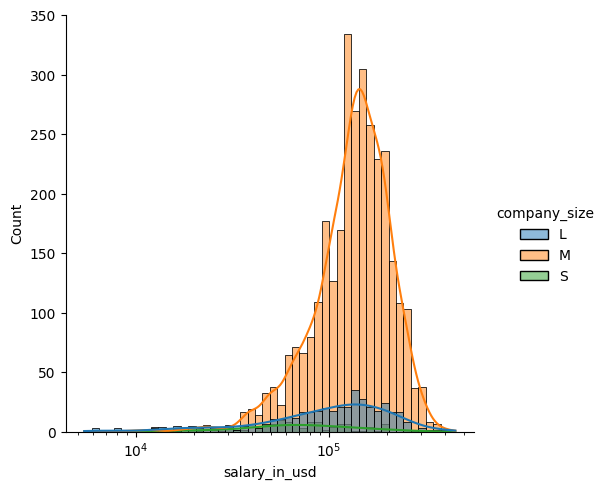

In [203]:
sns.displot(df, x='salary_in_usd', bins=50, hue='company_size', kde=True, log_scale=True)

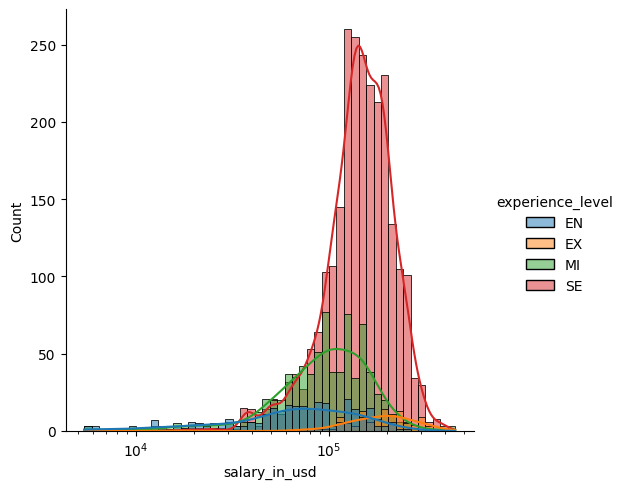

In [204]:
sns.displot(df, x='salary_in_usd', bins=50, hue='experience_level', kde=True, log_scale=True)

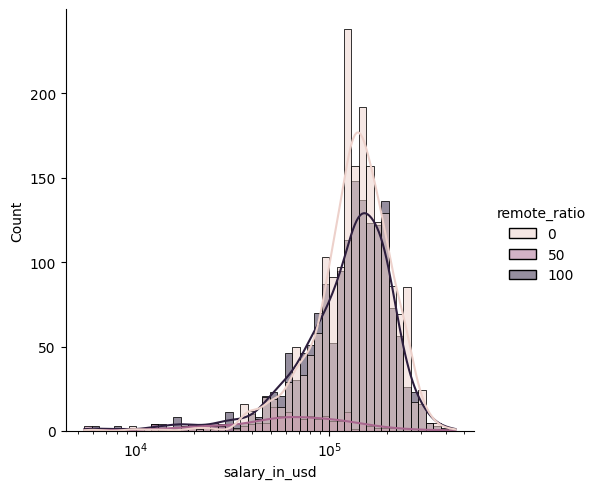

In [205]:
sns.displot(df, x='salary_in_usd', bins=50, hue='remote_ratio', kde=True, log_scale=True)

<Axes: >

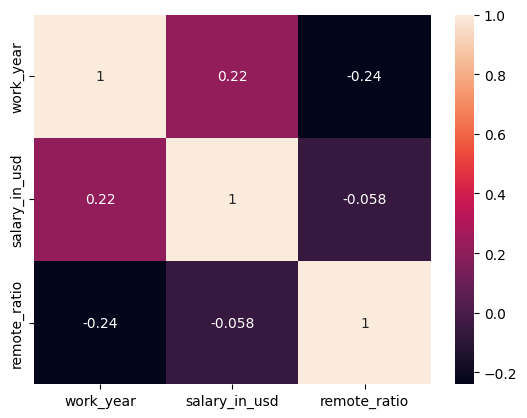

In [206]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

In [207]:
px.scatter(df, x='employee_residence', y='salary_in_usd', color='remote_ratio')

In [208]:
px.scatter(df, x='company_location', y='salary_in_usd', color='remote_ratio')

# Сохранение финального датасета

# Выводы